# Expectation Maximization Algorithm - Gaussian Mixture Models

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking for the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Creating variables for features to understand the distribution of data

In [5]:
gluc = df['Glucose']
bp = df['BloodPressure']
bmi = df['BMI']
dpf = df['DiabetesPedigreeFunction']
age = df['Age']

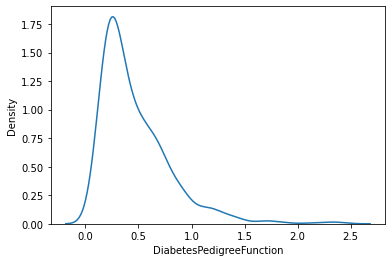

In [6]:
sns.distplot(dpf, hist=False)

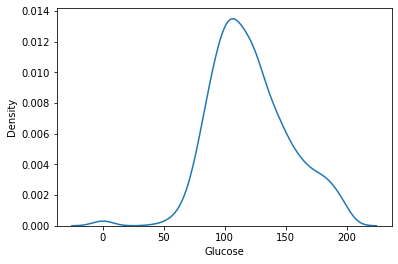

In [7]:
sns.distplot(gluc, hist=False)

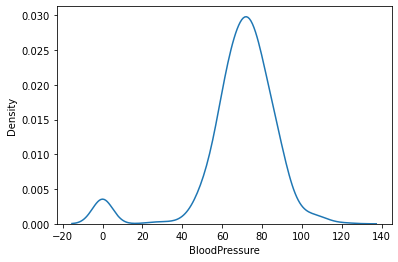

In [8]:
sns.distplot(bp, hist=False)


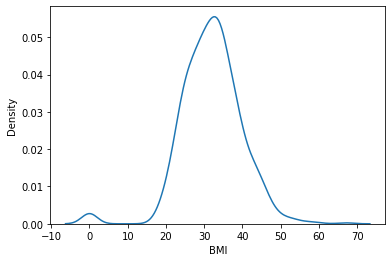

In [9]:
sns.distplot(bmi, hist=False)


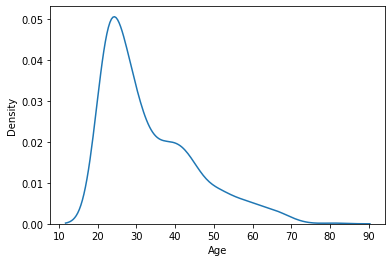

In [10]:
sns.distplot(age, hist=False)

# Observation:

From these plots we can assume that these feature distributions are not pure guassian mixture models. To provide best mixture models we can consider using guassian expectation maximization mixture model to get the best fit.

# GMM

In [11]:
def gaussian(x, mu, sigma):
    y = np.asarray(x)
    p = norm.pdf(y,mu,sigma)
    return p

#### The criterion followed for this gaussian distribution is considering mu and sigma, if absolute difference between the values is not greater than 0.01 then EM has converged.

In [12]:
#convergence criterion test for the gaussian mixture model
def convergence(mu, mu_previous, sigma, sigma_previous):
    n = len(mu)
    mu_diff = []
    sigma_diff = []
    
    #calculating the differences of mu and sigma between current and previous values
    for i in range(n):
        mu_diff.append(abs(mu[i]-mu_previous[i]))
        sigma_diff.append(abs(sigma[i]-sigma_previous[i]))
    
    
    mu_count = 0
    sigma_count = 0
    for i in range(n):
        if(mu_diff[i] < .01):
            mu_count = mu_count + 1
        if(sigma_diff[i] < .01):
            sigma_count = sigma_count + 1
    
    if(mu_count == n and sigma_count == n):
        return True
    else:
        return False

In [13]:
#Function to plot the mixture models
def plot_gaussian(x, z, title):
    z.sort()
    x2, y2 = zip(*z)
    # plot subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
    sns.distplot(x, hist=False, ax=ax1)
    ax1.set_title(title + " Probability")
    ax2.plot(x2,y2)
    ax2.set_title(title + " Gaussian Distribution")


### Implementation for Expectation Maximization Algorithm

In [14]:
def gaussian_mixture_model(x, d, title):
    #Initialization of variables required for gaussian models like mean, variance and mixtures
    M = len(x)
    k = d['k']
    mixture = 1/k
    mu = d['mu']
    mu_previous = []
    sigma = d['sigma']
    sigma_previous = []
    pi_k = []
    pi_k_previous = []
    latent = []
    gaus = []
    
    #Starting values needs to be set for mu and sigma    
    for i in range(k):
        mu_previous.append(100)
        sigma.append(10)
        sigma_previous.append(100)
        pi_k.append(mixture)
        latent.append([0] * M)
        
    #Initialization of gaussian variable
    for i in range(k):
        gaus.append(gaussian(x, mu[i], sigma[i]))
        
    #Steps of E and M needs to be repeated untill convergence criterion is met as mentioned earlier
    count = 0    
    while(not convergence(mu, mu_previous, sigma, sigma_previous) or count < 50):
        #E-step 
        #Calculating the Latent variable values
        for i in range(k):
            for j in range(M):
                lat_total = 0
                for l in range(k):
                    lat_total = lat_total + pi_k[l]*gaus[l][j]
                latent[i][j] = pi_k[i]*gaus[i][j]/lat_total
                
        #To test the convergence we will save the previous values
        mu_previous = mu.copy()
        sigma_previous = sigma.copy()
        pi_k_previous = pi_k.copy()      
        
        #M-step    
        #Values of mean, variance and mix coefficients are updated
        for i in range(k):
            mu_sum = 0
            sigma_sum = 0
            pi_sum = 0
            for j in range(M):
                mu_sum = mu_sum + (x[j] * latent[i][j])/sum(latent[i])
                sigma_sum = sigma_sum + ((x[j]-mu[i])**2 * latent[i][j])/sum(latent[i])
                pi_sum = pi_sum + latent[i][j]/M
            mu[i] = mu_sum
            sigma[i] = sqrt(sigma_sum)
            pi_k[i] = pi_sum
        
        # update gaussian models
        for i in range(k):
            gaus[i] = gaussian(x, mu[i] ,sigma[i])
        
        #count needs to be incremented
        count = count + 1
    
    #each sample is taken into consideration
    sample = [ list(x) for x in zip(*latent)]
    
    y = []
    
    for i in range(M):
        p_sum = 0
        for j in range(k):
            p_sum = p_sum + pi_k[j]*gaus[j][i]
        y.append(p_sum)

    z = list(zip(x,y))
    
    # plot function
    plot_gaussian(x, z, title)
    
    return

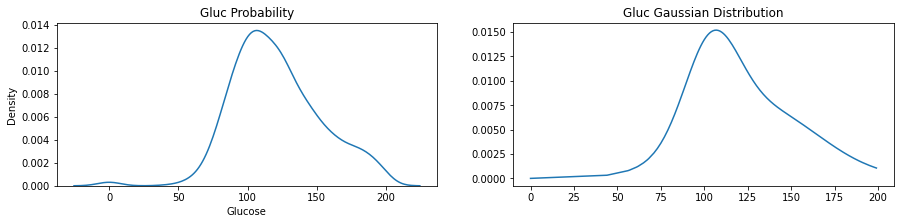

In [15]:
#GMM for Gluc feature
d1 = {'k':2, 'mu':[38.0,39.5], 'sigma':[10,10]}
y1 = gaussian_mixture_model(gluc, d1, "Gluc")

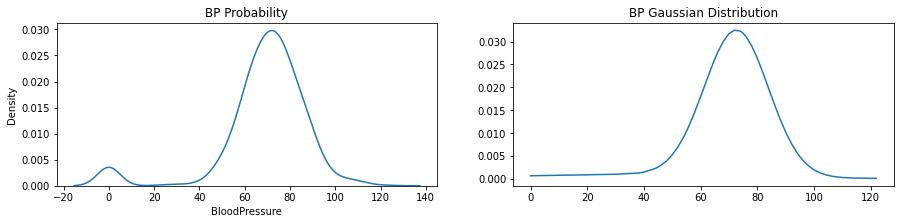

In [16]:
#GMM for BP feature
d1 = {'k':2, 'mu':[38.0,39.5], 'sigma':[10,10]}
y1 = gaussian_mixture_model(bp, d1, "BP")

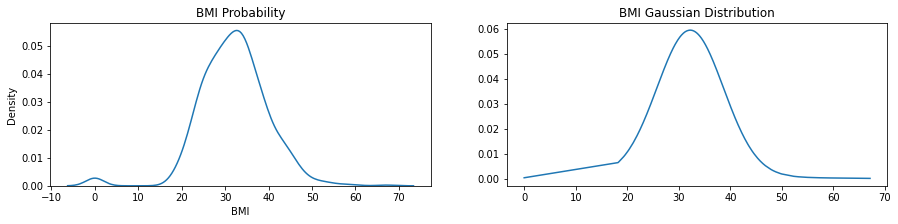

In [17]:
#GMM for BMI feature
d1 = {'k':2, 'mu':[38.0,39.5], 'sigma':[10,10]}
y1 = gaussian_mixture_model(bmi, d1, "BMI")

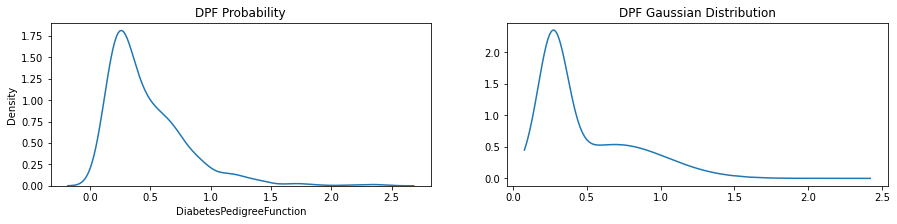

In [18]:
#GMM for DPF feature
d1 = {'k':2, 'mu':[38.0,39.5], 'sigma':[10,10]}
y1 = gaussian_mixture_model(dpf, d1, "DPF")

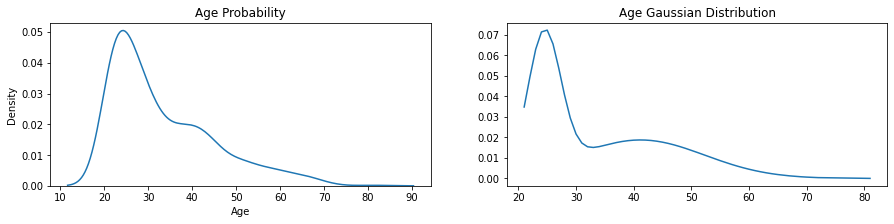

In [19]:
#GMM for Age feature
d1 = {'k':2, 'mu':[38.0,39.5], 'sigma':[10,10]}
y1 = gaussian_mixture_model(age, d1, "Age")

## Conclusion:

From the above graphs, we can conclude that Expectation Maximization Algorithm implemented had created Guassian Mixture Models more accurate than previously created probability distributions respectively.